In [1]:
import matplotlib.pyplot as plt
import numpy as np
import psycopg
from pgvector.psycopg import register_vector
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
conn = psycopg.connect(
    dbname="postgres_db",
    user="postgres_user",
    password="postgres_password",
    host="veld_embeddings_platform_run_sql_server",
    port="5432"
)
conn.autocommit = True
register_vector(conn)
cursor = conn.cursor()
cursor.execute("SELECT version();")
print(cursor.fetchone())

('PostgreSQL 17.4 on x86_64-pc-linux-gnu, compiled by gcc (Debian 10.2.1-6) 10.2.1 20210110, 64-bit',)


In [3]:
def show_plot_tsne(labels_embeddings, title=None):
    labels = labels_embeddings[0]
    values = labels_embeddings[1]
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(values)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c='blue', alpha=0.7)
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_tsne[i, 0], 
            reduced_vectors_tsne[i, 1], 
            label,
        )
    plt.title(title)
    plt.show()

In [4]:
def show_plot_pca(labels_embeddings, title=None):
    labels = labels_embeddings[0]
    values = labels_embeddings[1]
    
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(values)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='blue', alpha=0.7)
    #for i, label in enumerate(labels):
    #    plt.text(reduced[i, 0], reduced[i, 1], label, fontsize=9, ha='right')
    for r, l in zip(reduced, labels):
        plt.text(r[0], r[1], l)
    plt.title("PCA of BERT Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

In [5]:
def get_from_db():
    cursor.execute(
        "select lemma, sentence_id, token_index, embedding "
        "from embeddings__dbmdz__bert_base_german_cased__test "
        "where lemma='Mann' or lemma='Frau' order by sentence_id limit 50;"
    )
    rows = cursor.fetchall()
    labels = []
    embeddings = []
    for r in rows:
        l = r[0]
        if l == "Frau":
            l = " F"
        elif l == "Mann":
            l = " M"
        labels.append(l + "-" + str(r[1]) + "-" + str(r[2]))
        embeddings.append(r[3])
    embeddings = np.stack(embeddings)
    return (labels, embeddings)

labels_embeddings = get_from_db()

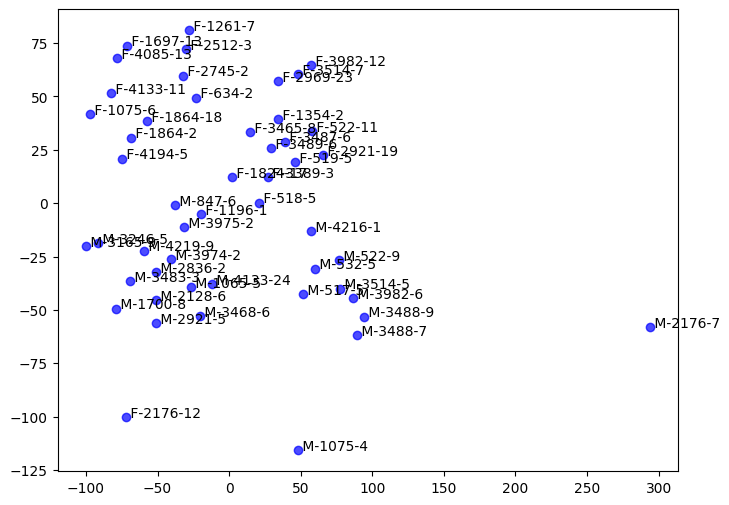

In [6]:
show_plot_tsne(labels_embeddings)

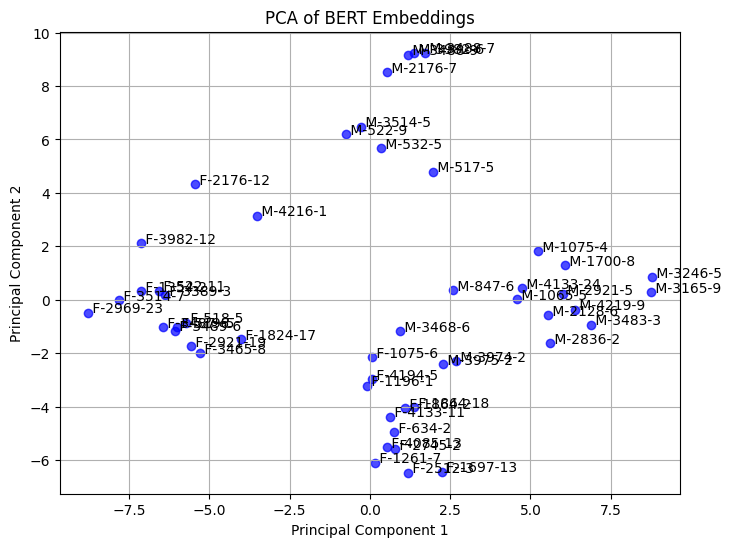

In [7]:
show_plot_pca(labels_embeddings)